In [2]:
# Importing the necessary Libraries
import pandas as pd
import numpy as np

Dataset link :-https://drive.google.com/file/d/1xhvU5Ylx_kN3vRIHqoR4gtX9fJu1q2Ob/view?usp=sharing

In [3]:
# reading the dataset
df=pd.read_csv('SalaryData.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,SalaryGT50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [10]:
# checking the no of records and the datatype of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             31978 non-null  int64 
 1   workclass       31978 non-null  object
 2   fnlwgt          31978 non-null  int64 
 3   education       31978 non-null  object
 4   education_num   31978 non-null  int64 
 5   marital_status  31978 non-null  object
 6   occupation      31978 non-null  object
 7   relationship    31978 non-null  object
 8   race            31978 non-null  object
 9   sex             31978 non-null  object
 10  capital_gain    31978 non-null  int64 
 11  capital_loss    31978 non-null  int64 
 12  hours_per_week  31978 non-null  int64 
 13  native_country  31978 non-null  object
 14  SalaryGT50K     31978 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


# Measures of Central Tendency

In [13]:
# calculating the average age of the employees
df['age'].mean()

38.57930452185878

In [12]:
# calculating the median value of the age
df['age'].median()

37.0

In [15]:
# checking the difference between the median  value and the mean value to understand any large/small value influence.
difference = (df['age'].mean()-df['age'].median())
print(difference)

1.5793045218587807


In [16]:
# how to find mean of more than one variable in the dataset
df[['age','fnlwgt','capital_gain','capital_loss','hours_per_week']].mean()

age                   38.579305
fnlwgt            189714.146257
capital_gain        1064.360623
capital_loss          86.739352
hours_per_week        40.417850
dtype: float64

In [18]:
# how to find median of more than one variable in the dataset
df[['age','fnlwgt','capital_gain','capital_loss','hours_per_week']].median()

age                   37.0
fnlwgt            178312.0
capital_gain           0.0
capital_loss           0.0
hours_per_week        40.0
dtype: float64

In [25]:
# calculating the geometric mean of the 'fnlwgt' variable.
from scipy.stats import gmean
print(gmean(df['fnlwgt']))

159951.80028438638


In [28]:
# calculating the weighted mean of 'age' having the effect of 'fnlwgt' variable
np.average(df['age'],weights=df['fnlwgt'])

37.99632835129173

In [29]:
# how to calculate mode of a variable to find the most frequent category of a variable.
df['relationship'].mode()

0     Husband
Name: relationship, dtype: object

In [30]:
# calculating the mode of more than one variable in a dataframe

df[['education','relationship','native_country']].mode()

,education,relationship,native_country
0,HS-grad,Husband,United-States


Finding the skewness of the 'fnlwgt' variable.As you can see it is highly skewed because 
it is more than 1 and is also positively skewed because its more than 1.

In [35]:
df['fnlwgt'].skew()

1.4481075698172947

Note :-A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

<AxesSubplot:ylabel='Frequency'>

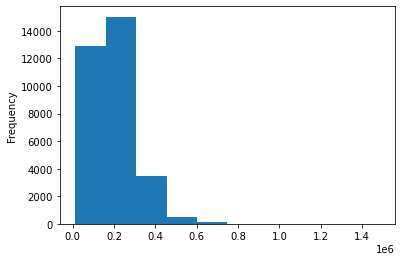

In [34]:
df['fnlwgt'].plot(kind='hist')

In [36]:
#  finding the kurtosis value for the variable 'hours_per_week'.The below value indicates it tends to be a platykurtic eventhough there is a sudden spike
df['hours_per_week'].kurt()

2.9172498692972217

Kurtosis is a measure of the tailedness of a distribution. Tailedness is how often outliers occur. Excess kurtosis is the tailedness of a distribution relative to a normal distribution. Distributions with medium kurtosis (medium tails) are mesokurtic. Distributions with low kurtosis (thin tails) are platykurtic

<AxesSubplot:ylabel='Frequency'>

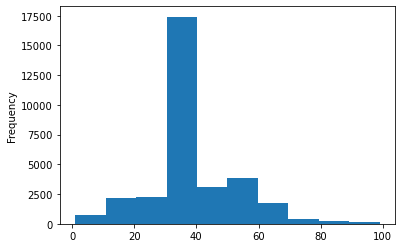

In [37]:
df['hours_per_week'].plot(kind='hist')

# Measures of Dispersion

In [40]:
# This is how we can find the range of a variable.it is known as the absolute measure of dispersion
range_deviation=df['age'].max()-df['age'].min()
print(range_deviation)

73


In [41]:
# Finding the coefficient of range. it is known as one of the relative meaures of dispersion
max_val = df['age'].max()
min_val=  df['age'].min()

coeff_range =(max_val-min_val)/(max_val+min_val)
print(coeff_range)

0.6822429906542056


In [46]:
# To compute variance of a variable in a dataframe with the help of pandas
df['age'].var()

186.31914762900323

In [53]:
# To compute variance of a variable in a dataframe with the help of Numpy
np.var(df['age'])

186.31914762900323

In [5]:
# To compute standard deviation of a variable in a dataframe with the help of pandas
df['age'].std()

13.649877201975233

In [6]:
# To compute standard deviation of a variable in a dataframe with the help of Numpy
np.std(df['age'])

13.64966377424497

In [7]:
# Select the first quantile
q1 = df['age'].quantile(.25)
# Select the third quantile
q3 = df['age'].quantile(.75)
# Create a mask inbeetween q1 & q3
mask = df['age'].between(q1, q3, inclusive=True)
# Filtering the initial dataframe with a mask
iqr = df.loc[mask, 'age']
print(iqr)       

0        39
2        38
4        28
5        37
8        31
         ..
31967    43
31968    32
31969    43
31970    32
31974    40
Name: age, Length: 16563, dtype: int64


C:\Users\Biswajit Roy\AppData\Local\Temp\ipykernel_135796\3405112712.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  mask = df['age'].between(q1, q3, inclusive=True)


<AxesSubplot:>

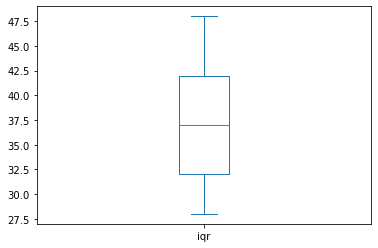

In [8]:
df['iqr']=iqr
df['iqr'].plot(kind='box')

In [67]:
q1=np.percentile (df['age'], 25 , interpolation = 'midpoint' )
q3=np.percentile (df['age'], 75 , interpolation = 'midpoint' )
mask = df['age'].between(q1, q3, inclusive=True)
iqr = df.loc[mask, 'age']
print(iqr)       


0        39
2        38
4        28
5        37
8        31
         ..
31967    43
31968    32
31969    43
31970    32
31974    40
Name: age, Length: 16563, dtype: int64


C:\Users\Biswajit Roy\AppData\Local\Temp\ipykernel_152368\2654970953.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  mask = df['age'].between(q1, q3, inclusive=True)
